In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [2]:
united_flights = Table.read_table('united.csv')

In [3]:
united_flights

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


**Discussion Question 1.1:** How long was flight 73 to `'HNL'` delayed? 

**Discussion Question 1.2:** How long was flight 273 to `'SEA'` delayed? 

## New Material
- See if you can find which uses of data visualizations are inappropriate out of the ones used in this demo! There are a few.

### Attributes have types

In [12]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [5]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2019')

In [6]:
# Make things easier to read
us_pop_2019 = partial.relabeled(2, '2019')
us_pop_2019.show(5)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044
0,3,3998665
0,4,4043323


**Discusssion Question 2:** Which of these three attributes are numerical/categorical? (1 min)

In [7]:
np.average(us_pop_2019.column('AGE'))

59.303921568627452

In [ ]:
np.average(us_pop_2019.where('AGE', are.below(999)).column('AGE'))

### Some plots for numerical attributes

**Task**: Plot the total population (in millions) among each age increases.

In [8]:
total_below_999 = us_pop_2019.where('AGE',are.below(999)).where('SEX', 0)
total_below_999 = total_below_999.with_columns('Population (in millions)', total_below_999.column('2019')/1e6) 


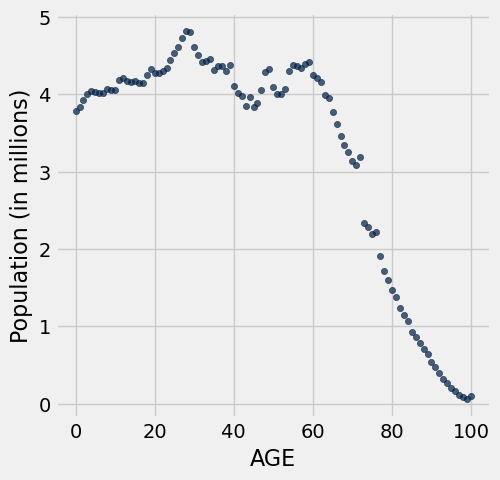

In [9]:
total_below_999.scatter('AGE', 'Population (in millions)')

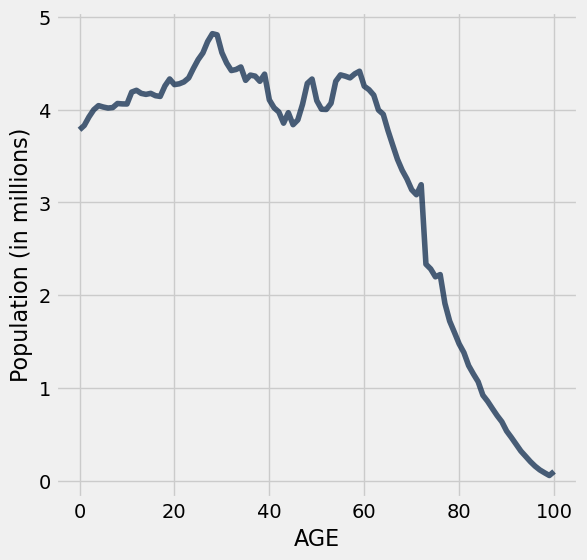

In [10]:
total_below_999.plot('AGE', 'Population (in millions)')

_____

**Discussion Question 3:** What are some things you notice from the below visualization? I see at least two! (1 min)

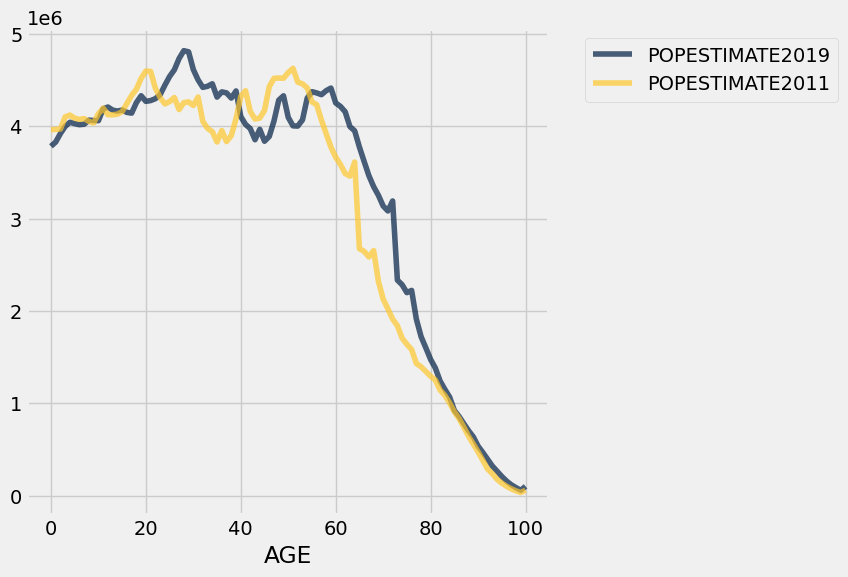

In [11]:
full.select('AGE', 'SEX', 
            'POPESTIMATE2019', 'POPESTIMATE2011').where('AGE',
                                                        are.below(999)).where('SEX',
                                                                              0).drop('SEX').plot('AGE')


______

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

**Task:** Plot the relationship between the number of movies cast and average salary per movie among famous Hollywood actors.

In [ ]:
actors.plot('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

### Plots for categorical data

In [ ]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

**Task**: Visualize the top 10 highest adjusted grossing movies by US dollars (in millions).

In [ ]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

In [ ]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

**Challenge Task**:
- Generate the chart shown in the slides: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).

### Good visualization practices

#### Titling plots
- Just add a `print()` statement after your plotting code.

##### Bad title:

In [ ]:
total_below_999.plot('AGE', 'Population (in millions)')
print('US Population in 2019 by age')  

##### Good title:

In [ ]:
total_below_999.plot('AGE', 'Population (in millions)')
print('Population counts in 2019 show a steep decline around age 60')  